In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from pathlib import Path
import itertools
import numpy as np
import torch
import time
from tqdm import tqdm
import seaborn as sns

sns.set()

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{bm}'

In [17]:
runs_num = 11
run = np.load(f"/media/laves/bo_results_mfvi_inp_good/14_fig_data.npz", allow_pickle=True)

out_path = f'./bo_results/inp'
Path(out_path).mkdir(parents=True, exist_ok=True)

In [18]:
XX_lr = run['XX_lr']
XX_wd = run['XX_wd']
pred = run['pred']
X = run['observed_X']
acq = run['acq']
confidence = run['confidence']
candidates = run['candidates']
exp_imp = run['expected_improvement']

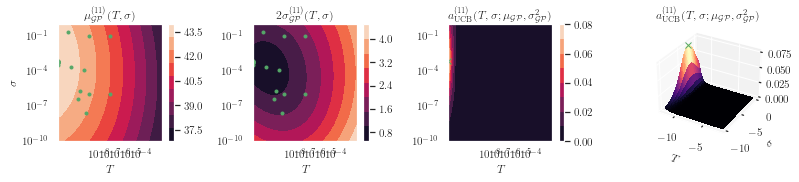

In [19]:
fig = plt.figure(figsize=(11, 2.7))

ax0 = fig.add_subplot(141)
ax1 = fig.add_subplot(142, sharey=ax0)
ax2 = fig.add_subplot(143, sharey=ax0)
ax3 = fig.add_subplot(144, projection='3d')

ln11 = ax0.contourf(XX_lr, XX_wd, pred)
ln12 = ax0.plot(np.array(X)[:,0], np.array(X)[:,1], 'g.', label='observed')
ax0.set_title(r"$ \mu_{\mathcal{GP}}^{("+f"{runs_num}"+r")}(T, \sigma) $")
cb1 = fig.colorbar(ln11, ax=ax0)
tick_locator1 = matplotlib.ticker.MaxNLocator(nbins=5)
cb1.locator = tick_locator1
cb1.update_ticks()
ax0.set_xlabel(r'$ T $')
ax0.set_ylabel(r'$ \sigma $')
ax0.loglog()
ax0.set_xticks([1e-8, 1e-7, 1e-6, 1e-5, 1e-4])

ln21 = ax1.contourf(XX_lr, XX_wd, confidence)
ln22 = ax1.plot(np.array(X)[:,0], np.array(X)[:,1], 'g.', label='observed')
ax1.set_title(r"$ 2\sigma_{\mathcal{GP}}^{("+f"{runs_num}"+r")}(T, \sigma) $")
cb2 = fig.colorbar(ln21, ax=ax1)
tick_locator2 = matplotlib.ticker.MaxNLocator(nbins=5)
cb2.locator = tick_locator2
cb2.update_ticks()
ax1.set_xlabel(r'$T$')
ax1.semilogx()
ax1.set_xticks([1e-8, 1e-7, 1e-6, 1e-5, 1e-4])

ln31 = ax2.contourf(XX_lr, XX_wd, acq)
ln32 = ax2.plot(candidates[:,0], candidates[:,1], 'gx', label='candidates')
ax2.set_title(r"$ a^{("+f"{runs_num}"+r")}_{\mathrm{UCB}}(T, \sigma; \mu_{\mathcal{GP}}, \sigma^{2}_{\mathcal{GP}}) $")
ax2.set_xlabel(r'$T$')
#ax[2].set_ylabel(r'$\tau$')
ax2.semilogx()
ax2.set_xticks([1e-8, 1e-7, 1e-6, 1e-5, 1e-4])
cb3 = fig.colorbar(ln31, ax=ax2)
tick_locator3 = matplotlib.ticker.MaxNLocator(nbins=5)
cb3.locator = tick_locator3
cb3.update_ticks()

ln41 = ax3.plot_surface(np.log10(XX_lr),
                        np.log10(XX_wd),
                        acq,
                        cmap=cm.magma,
                        #vmin=np.min(acq),
                        #vmax=np.max(acq),
                        linewidth=0, antialiased=False)
ax3.set_facecolor('none')
ax3.set_title(r"$ a^{("+f"{runs_num}"+r")}_{\mathrm{UCB}}(T, \sigma; \mu_{\mathcal{GP}}, \sigma^{2}_{\mathcal{GP}}) $")
ax3.set_xlabel(r"$ T $")
ax3.set_ylabel(r"$ \sigma $")
ax3.plot(np.log10(candidates[:,0]), np.log10(candidates[:,1]), exp_imp, 'gx')

fig.tight_layout()
fig.patch.set_facecolor('None')
fig.savefig(f'{out_path}/{runs_num}_fig_3d.pdf', bbox_inches='tight',
            transparent=True, facecolor=fig.get_facecolor(), edgecolor='none')
fig.show()

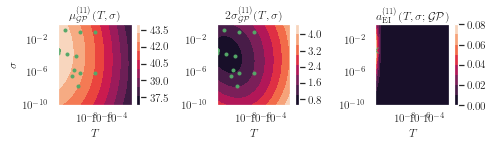

In [20]:
fig = plt.figure(figsize=(7, 2.2))

ax0 = fig.add_subplot(131)
ax1 = fig.add_subplot(132, sharey=ax0)
ax2 = fig.add_subplot(133, sharey=ax0)

ln11 = ax0.contourf(XX_lr, XX_wd, pred)
ln12 = ax0.plot(np.array(X)[:,0], np.array(X)[:,1], 'g.', label='observed')
ax0.set_title(r"$ \mu_{\mathcal{GP}}^{("+f"{runs_num}"+r")}(T, \sigma) $")
cb1 = fig.colorbar(ln11, ax=ax0)
tick_locator1 = matplotlib.ticker.MaxNLocator(nbins=5)
cb1.locator = tick_locator1
cb1.update_ticks()
ax0.set_xlabel(r'$T$')
ax0.set_ylabel(r'$\sigma$')
ax0.loglog()
ax0.set_xticks([1e-8, 1e-6, 1e-4])

ln21 = ax1.contourf(XX_lr, XX_wd, confidence)
ln22 = ax1.plot(np.array(X)[:,0], np.array(X)[:,1], 'g.', label='observed')
ax1.set_title(r"$ 2\sigma_{\mathcal{GP}}^{("+f"{runs_num}"+r")}(T, \sigma) $")
cb2 = fig.colorbar(ln21, ax=ax1)
tick_locator2 = matplotlib.ticker.MaxNLocator(nbins=5)
cb2.locator = tick_locator2
cb2.update_ticks()
ax1.set_xlabel(r'$T$')
ax1.semilogx()
ax1.set_xticks([1e-8, 1e-6, 1e-4])

ln31 = ax2.contourf(XX_lr, XX_wd, acq)
ln32 = ax2.plot(candidates[:,0], candidates[:,1], 'gx', label='candidates')
ax2.set_title(r"$ a^{("+f"{runs_num}"+r")}_{\mathrm{EI}}(T, \sigma; \mathcal{GP}) $")
ax2.set_xlabel(r'$T$')
#ax[2].set_ylabel(r'$\tau$')
ax2.semilogx()
ax2.set_xticks([1e-8, 1e-6, 1e-4])
cb3 = fig.colorbar(ln31, ax=ax2)
tick_locator3 = matplotlib.ticker.MaxNLocator(nbins=5)
cb3.locator = tick_locator3
cb3.update_ticks()

fig.tight_layout()
fig.patch.set_facecolor('None')
fig.savefig(f'{out_path}/{runs_num}_fig_2d.pdf', bbox_inches='tight',
            transparent=True, facecolor=fig.get_facecolor(), edgecolor='none')
fig.show()